<a href="https://colab.research.google.com/github/rafiff18/Machine-Learning-Ti-2b/blob/main/5.pengenalan%20tensorflow%20dan%20keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras

star dataset_klasifikasi

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.utils import to_categorical


In [5]:
# Load dataset CSV
df = pd.read_csv('6 class csv.csv')  # Ganti dengan path lokal jika perlu
print(df.head())


   Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)  Absolute magnitude(Mv)  \
0             3068          0.002400        0.1700                   16.12   
1             3042          0.000500        0.1542                   16.60   
2             2600          0.000300        0.1020                   18.70   
3             2800          0.000200        0.1600                   16.65   
4             1939          0.000138        0.1030                   20.06   

   Star type Star color Spectral Class  
0          0        Red              M  
1          0        Red              M  
2          0        Red              M  
3          0        Red              M  
4          0        Red              M  


In [10]:
# Pisahkan fitur dan label
X_raw = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Konversi semua kolom kategorikal pada X menjadi one-hot encoding
X = pd.get_dummies(X_raw)

# Encode label ke angka
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_cat = to_categorical(y_encoded)
class_names = label_encoder.classes_

# Normalisasi fitur numerik
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [11]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X_scaled, y_cat, test_size=0.2, random_state=42)
X_valid, X_train = X_train_full[:500], X_train_full[500:]
y_valid, y_train = y_train_full[:500], y_train_full[500:]


In [12]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Dense(300, activation="relu", input_shape=[X.shape[1]]),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(len(class_names), activation="softmax")
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
from sklearn.model_selection import train_test_split

# Split data menjadi training dan validasi (80:20)
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled, y_cat, test_size=0.2, random_state=42)

# Cek ukuran datanya
print("Ukuran X_train:", X_train.shape)
print("Ukuran y_train:", y_train.shape)


Ukuran X_train: (192, 24)
Ukuran y_train: (192, 7)


In [16]:
model.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))



Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.9090 - loss: 0.5078 - val_accuracy: 0.8958 - val_loss: 0.7053
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9090 - loss: 0.4958 - val_accuracy: 0.8958 - val_loss: 0.6955
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9090 - loss: 0.4846 - val_accuracy: 0.8958 - val_loss: 0.6862
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9090 - loss: 0.4741 - val_accuracy: 0.8958 - val_loss: 0.6775
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9090 - loss: 0.4642 - val_accuracy: 0.8958 - val_loss: 0.6694
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9090 - loss: 0.4549 - val_accuracy: 0.8958 - val_loss: 0.6619
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9090 - loss: 0.4462 - val_accuracy: 0.8958 - val_loss: 0.6547
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9090 - loss: 0.4379 - val_accuracy: 0.8958 - val_loss: 0.6479


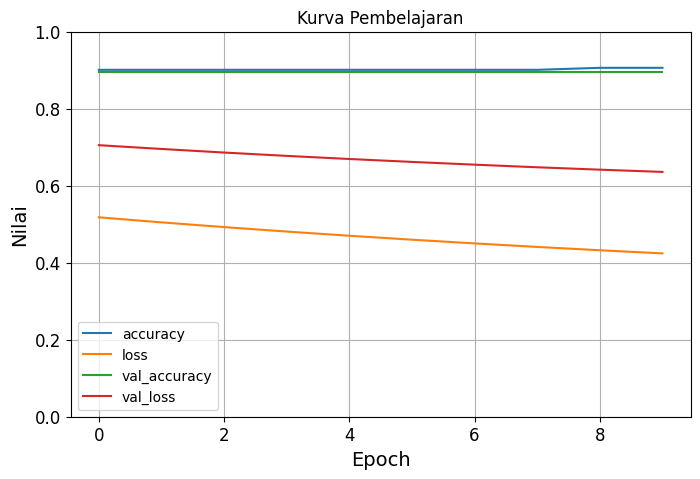

In [17]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title("Kurva Pembelajaran")
plt.xlabel("Epoch")
plt.ylabel("Nilai")
plt.show()


In [18]:
model.evaluate(X_test, y_test)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8785 - loss: 0.7069


[0.6358642578125, 0.8958333134651184]

In [22]:
X_new = X_test[:10]
y_proba = model.predict(X_new)
y_pred = np.argmax(y_proba, axis=1)
y_label = np.argmax(y_test[:10], axis=1)

print("Prediksi:", np.array(class_names)[y_pred])
print("Sebenarnya:", np.array(class_names)[y_label])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
Prediksi: ['B' 'M' 'A' 'O' 'O' 'M' 'O' 'B' 'M' 'B']
Sebenarnya: ['B' 'M' 'K' 'O' 'O' 'K' 'B' 'B' 'M' 'B']
